## Setup Requirements

In [5]:
%%capture

import sys

!{sys.executable} -m pip install virustotal3
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install python-dotenv

In [6]:
import json
import virustotal3.core as vt3core
from dotenv import load_dotenv
import os
import csv
import time
import datetime

load_dotenv()

VT_API = os.getenv('VT_API')
vtcore_files = vt3core.Files(VT_API)
vtcore_domains = vt3core.Domains(VT_API)

collected_data_dir = './collected_data'
input_file = './indicators.csv'
timeline_csv = './timeline.csv'
dates = []

## Get Data from VirusTotal

In [8]:
# Read indicator records from input CSV file
csv_file = open(input_file, 'r')
csv_file_records = csv.DictReader(csv_file)

for record in csv_file_records:
    record_type = record['Type']
    record_value = record['Value']
    
    record_out_path = '{0}/{1}.json'.format(collected_data_dir, record_value)
    
    print("Getting data from VirusTotal for " + record_value)

    # Query VT and save indicator info if data does not exist
    if(os.path.exists(record_out_path) == False):
        
        if(record_type == 'File'):
            record_info = vtcore_files.info_file(record_value)
        elif(record_type == 'Host'):
            record_info = vtcore_domains.info_domain(record_value)
        
        with open(record_out_path, 'w+') as out_data:
            out_data.write(json.dumps(record_info, indent=2))

    # Parse indicator data file for dates
    with open(record_out_path) as record_file:
        record_info_all = json.loads(record_file.read())
        record_info_data = record_info_all['data']['attributes']

        # Add dates for indicator to timeline file
        with open(timeline_csv, 'a+') as timeline_file:
            timeline_writer = csv.writer(timeline_file)
            
            if('creation_date' in record_info_data):
                creation_date = datetime.datetime.fromtimestamp(record_info_data['creation_date'])
                timeline_writer.writerow([record_value, 'Creation Date', creation_date])
            
            if('last_modification_date' in record_info_data):
                modification_date = datetime.datetime.fromtimestamp(record_info_data['last_modification_date'])
                timeline_writer.writerow([record_value, 'Last Modification Date', modification_date])
            
            if(record_type == 'File'):
                submission_date = datetime.datetime.fromtimestamp(record_info_data['first_submission_date'])
                timeline_writer.writerow([record_value, 'First Submission Date', submission_date])

    # time.sleep(60)
                    
csv_file.close()

Getting data from VirusTotal for 6BF7CE4065FD8AD8071E94AABE062C88
Getting data from VirusTotal for 40DCD7C8C0B989FB442390582525CB18
Getting data from VirusTotal for 1BA4C72957D82D01D276643BAABDD3D7
Getting data from VirusTotal for 3E38999A11CDA8C9290DBE02B0E4634A
Getting data from VirusTotal for D628A5CCE3CB340FFA5D7A07A12A3BB6
Getting data from VirusTotal for E336DC35C967CB59E0961E41D1E93A15
Getting data from VirusTotal for 6D7F2042F34A19DA41A09A1BF3371CDE
Getting data from VirusTotal for 5B4B42A8A730FAE1B786326F27613DA4
Getting data from VirusTotal for B2FE8C3BA2B9639F34C1727D50C4918D


## Print Saved Dates

In [9]:
import pandas as pd

df = pd.read_csv(timeline_csv, sep=",", names=["IOC", "Date Type", "Date"])
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by=['Date'])

,IOC,Date Type,Date
20,5B4B42A8A730FAE1B786326F27613DA4,Creation Date,2018-05-30 02:09:29
22,5B4B42A8A730FAE1B786326F27613DA4,First Submission Date,2018-07-30 00:30:50
23,B2FE8C3BA2B9639F34C1727D50C4918D,Creation Date,2018-11-25 02:36:21
25,B2FE8C3BA2B9639F34C1727D50C4918D,First Submission Date,2018-11-27 06:32:57
14,E336DC35C967CB59E0961E41D1E93A15,Creation Date,2020-03-26 03:02:47
17,6D7F2042F34A19DA41A09A1BF3371CDE,Creation Date,2020-06-28 23:46:00
8,3E38999A11CDA8C9290DBE02B0E4634A,Creation Date,2020-06-28 23:46:00
5,1BA4C72957D82D01D276643BAABDD3D7,Creation Date,2021-06-18 05:35:25
1,6BF7CE4065FD8AD8071E94AABE062C88,First Submission Date,2021-06-18 09:19:30
7,1BA4C72957D82D01D276643BAABDD3D7,First Submission Date,2021-06-18 12:37:17


### Graph by Time of Day

<AxesSubplot:xlabel='Time'>

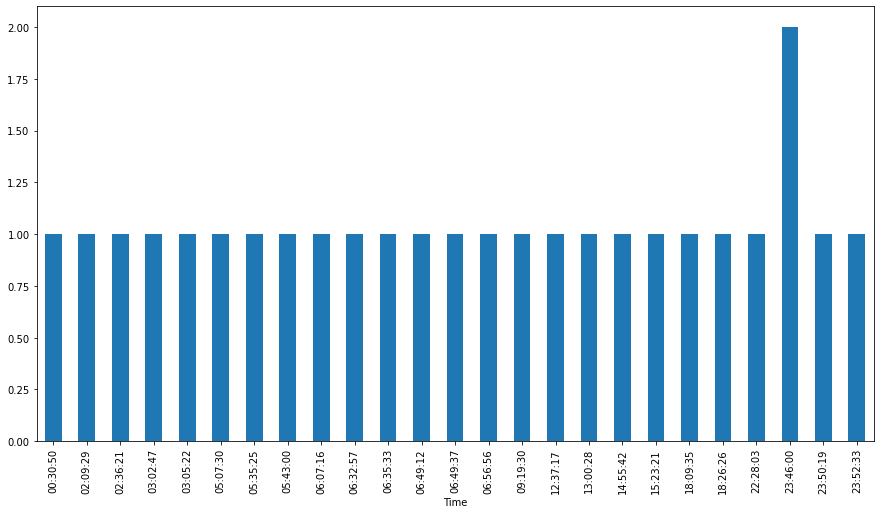

In [10]:
without_date = df['Date'].apply( lambda d : d.time() )
df['Time'] = without_date
df.groupby(['Time']).count()['IOC'].plot(kind='bar', figsize=[15,8])

<AxesSubplot:xlabel='Time'>

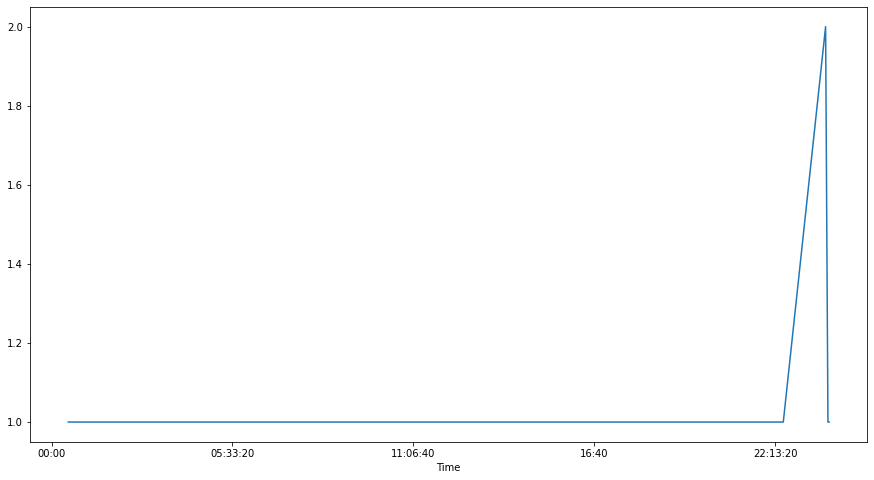

In [31]:
df.groupby(['Time']).count()['IOC'].plot(figsize=[15,8])

### Graph by Date

<AxesSubplot:xlabel='Date_notime'>

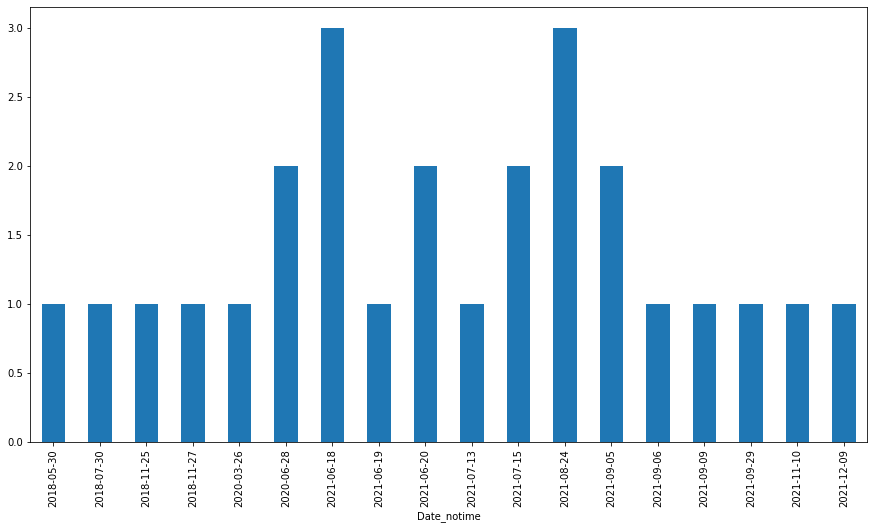

In [11]:
without_time = df['Date'].apply( lambda d : d.date() )
df['Date_notime'] = without_time
df.groupby(['Date_notime']).count()['IOC'].plot(kind='bar', figsize=[15,8])

<AxesSubplot:xlabel='Date_notime'>

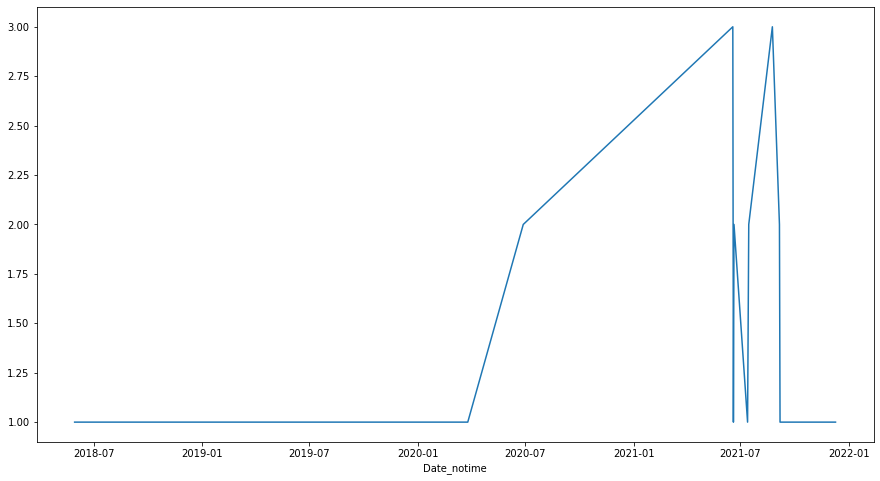

In [30]:
df.groupby(['Date_notime']).count()['IOC'].plot(figsize=[15,8])

### Graph by Weekday

<AxesSubplot:xlabel='Weekday'>

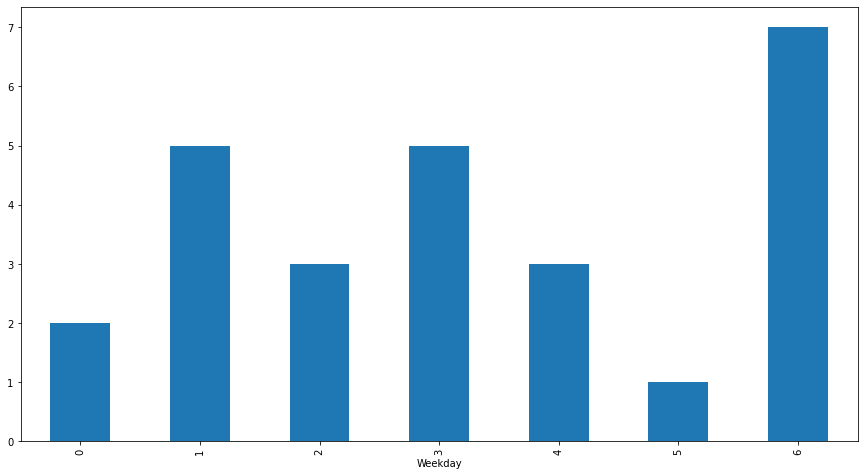

In [12]:
without_time = df['Date'].apply( lambda d : d.weekday() )
df['Weekday'] = without_time
df.groupby(['Weekday']).count()['IOC'].plot(kind='bar', figsize=[15,8])

<AxesSubplot:xlabel='Weekday'>

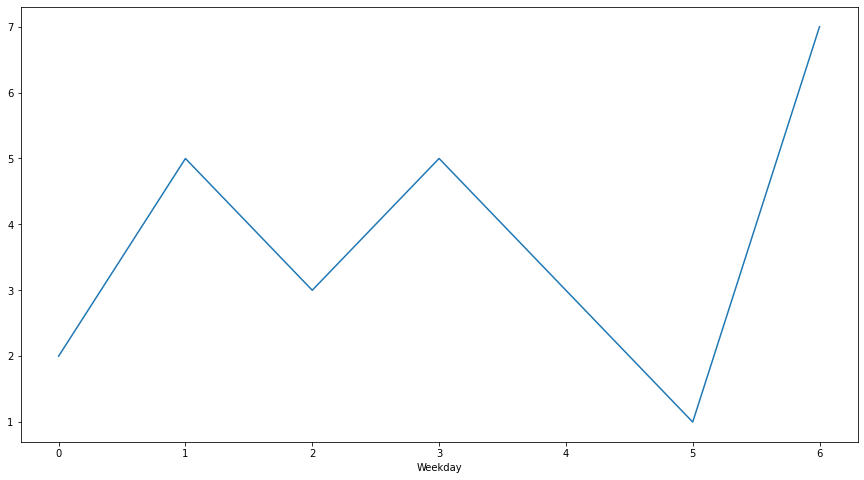

In [29]:
df.groupby(['Weekday']).count()['IOC'].plot(figsize=[15,8])